In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import json
import numpy as np
from collections import Counter

## Part 1 Explorartory data analysis

In [2]:
# Load json file into Pandas dataframe, read login_time as datetime objects
df_login = pd.read_json('logins.json', convert_dates=True)

# Set login_time as index
df_login = df_login.set_index('login_time').sort_values(by='login_time')

# Add count
df_login['count'] = 1

# Resample login times by 15-minute intervals
df_login_15min = df_login.resample('15min').count()

df_login_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


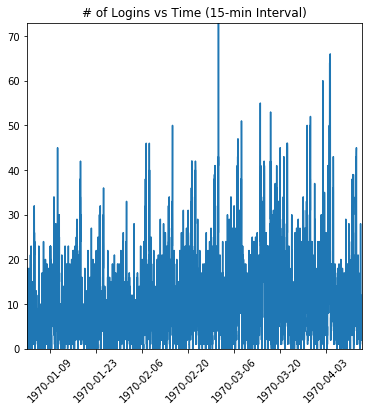

It looks like from January to April the trend is that the # of logins are increasing.


In [3]:
# Plot # of logins vs time in 15-min intervals

plt.figure(figsize=(6,6))
plt.plot(df_login_15min)
plt.title('# of Logins vs Time (15-min Interval)')
plt.xlim(df_login_15min.index.values[0], df_login_15min.index.values[-1])
plt.ylim(df_login_15min[['count']].min().values[0], df_login_15min[['count']].max().values[0])
plt.xticks(rotation=45)
plt.show()

print('It looks like from January to April the trend is that the # of logins are increasing.')

In [4]:
df_login_15min.sort_values(by='count',ascending=False).head(5)
print('There are some 15-min peaks on these days that have significantly more logins.')

There are some 15-min peaks on these days that have significantly more logins.


The trend is seems more obvious when the resampling intervals is 1-day that the # of logins are increasing.


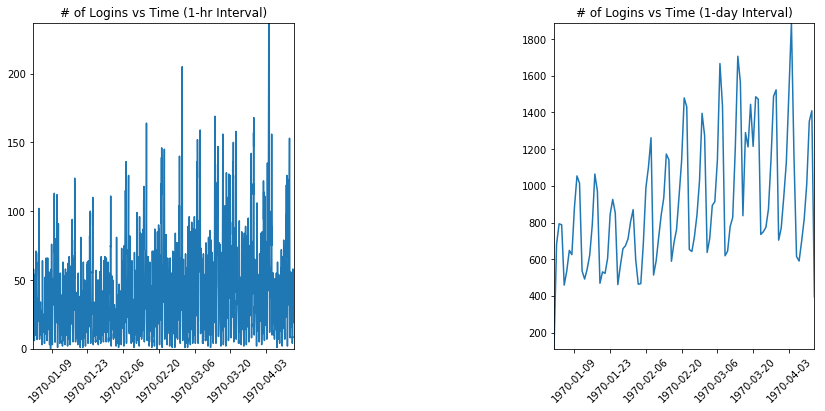

In [5]:
# Plot # of logins vs time in 1-hr and 1-day intervals

# Resample login times by 1-hr and by 1-day intervals
df_login_hr = df_login.resample('H').count()
df_login_day = df_login.resample('D').count()

fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(hspace=1, wspace=1)

plt.subplot(1,2,1)
plt.plot(df_login_hr)
plt.title('# of Logins vs Time (1-hr Interval)')
plt.xlim(df_login_hr.index.values[0], df_login_hr.index.values[-1])
plt.ylim(df_login_hr[['count']].min().values[0], df_login_hr[['count']].max().values[0])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.plot(df_login_day)
plt.title('# of Logins vs Time (1-day Interval)')
plt.xlim(df_login_day.index.values[0], df_login_day.index.values[-1])
plt.ylim(df_login_day[['count']].min().values[0], df_login_day[['count']].max().values[0])
plt.xticks(rotation=45)

print('The trend is seems more obvious when the resampling intervals is 1-day that the # of logins are increasing.')

In [6]:
# of days in dataset
print(f'# of days in dataset = {len(df_login_day)}')

# Take dataframe resampled by 1-day intervals and add the day of week to it
days = ['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday']
generate_dow_list = []

for num1 in range(int(len(df_login_day)/7)):    
    for num2 in range(7):
        generate_dow_list.append(days[num2])

for num3 in range(int(len(df_login_day)%7)):
    generate_dow_list.append(days[num3])
    
df_login_day_dow = df_login_day
df_login_day_dow['day_of_week'] = generate_dow_list
df_login_day_dow = df_login_day_dow.groupby(['day_of_week']).sum()
df_login_day_dow = df_login_day_dow.sort_values(by='count',ascending=False)
df_login_day_dow

# of days in dataset = 103


,count
day_of_week,
Saturday,19377
Sunday,18167
Friday,15208
Thursday,11960
Wednesday,10339
Tuesday,9268
Monday,8823


In [7]:
df_login_hr_dn = df_login_hr
generate_dn_list = []

for num in range(len(df_login_hr_dn)):
    
    if (df_login_hr_dn.index[num].hour >= 0) and (df_login_hr_dn.index[num].hour < 6): 
        generate_dn_list.append('midnight')
    
    elif (df_login_hr_dn.index[num].hour >= 6) and (df_login_hr_dn.index[num].hour < 12): 
        generate_dn_list.append('morning')

    elif (df_login_hr_dn.index[num].hour >= 12) and (df_login_hr_dn.index[num].hour < 18): 
        generate_dn_list.append('afternoon')
    
    else:   
        generate_dn_list.append('evening')
        
df_login_hr_dn['time_of_the_day'] = generate_dn_list
df_login_hr_dn = df_login_hr_dn.groupby(['time_of_the_day']).sum()
df_login_hr_dn = df_login_hr_dn.sort_values(by='count',ascending=False)
df_login_hr_dn

,count
time_of_the_day,
midnight,30920
evening,28606
afternoon,20455
morning,13161


There are significantly more logins during the weekend.
There are significantly more logins during night times.


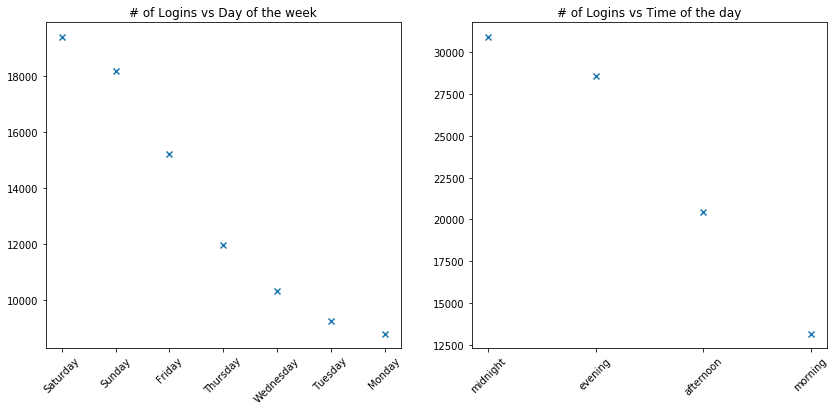

In [8]:
fig = plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.scatter(df_login_day_dow.index.values,df_login_day_dow['count'].values,marker="x")
plt.title('# of Logins vs Day of the week')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.scatter(df_login_hr_dn.index.values,df_login_hr_dn['count'].values,marker="x")
plt.title('# of Logins vs Time of the day')
plt.xticks(rotation=45)

print('There are significantly more logins during the weekend.')
print('There are significantly more logins during night times.')

In [9]:
# In summary --- 

# There seems to be a trend that the # of logins are increasing from January thru April.

# There are more logins during the weekend and during night times.

# There are some 15-min peaks on these days that have significantly more logins.

#df_login.loc['1970-03-01 04:30:00':'1970-03-01 04:45:00']
df_login_15min.sort_values(by='count',ascending=False).head(5)

,count
login_time,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60


## Part 2 Experiment and metrics design

#### Answer:

1. A key measure of success is to compare the number of toll crossings by the driver-partners transporting customers with or without the reimbursement incentive. Because it would show whether the driver-partners are still staying exclusive to each city or they are picking up customers that are going to the other city. <br><br> One way is to compare before and after the reimbursement incentive in place, although the time difference may introduce other variables into the experiment.<br><br>Another way is to measure in the same period by selecting two groups from the driver-partners. One group receives the reimbursement incentive and the other group does not.<br><br>

2. We will take the second approach in 1. above. Assuming each toll crossing can be indicated by the differences in coordinates of starting location of the trip and the destination of the trip.<br>

   First we take a sample of the total population of driver-partners, say 10% = 1000 drivers, and provide them the reimbursement incentive for a certain duration of time. At the end of this duration, we add up the total number of toll crossings of the driver-partners in this group within this period, denote N_with_reimb.<br>
   
   We then set up a hypothesis test.<br>
   
   Null hypothesis H_o: Reimbursement incentive does not increase the number of toll crossings by driver-partners<br>
   
   Alternative hypothesis H_a: Reimbursement incentive increases the number of toll crossings by driver-partners<br>
   
   Significance level = 0.05<br>
   
   Bootstrap 10,000 random samples from the remaining 90% of the total population of driver-partners that do not receive the reimbursement incentive. Each randomly sampled size is also 1000 drivers.<br>
   
   For each random sample, calculate the total number of toll crossings of the driver-partners within the same period, denote N_without_reimb_i (i from 1 to 10,000).<br>
   
   In the 10,000 samples, obtain percentage of how many times N_without_reimb_i >= N_with_reimb, this is the p-value.
   
   if p-value > 0.05, accept null hypothesis. 
   
   if p-value < 0.05, reject null hypothesis.     
   
   The result is statistically significant with a p-value > 0.05, equivalent to 95% confidence, that what we observe in the group of drivers with reimbursement incentive can be due to natural variation.
   
   However, if p-value < 0.05, it means that the observation is less likely to be due to randomness. We would be more likely to recommend the reimbursement incentive to the city operations team. However, from a business perspective, the reimbursement incentive, as a business investment, would profit only if the increase in revenue is greater than the reimbursements being paid out. This aspect is beyond this exercise to be considered.   
   

## Part 3 Predictive modeling for user retention

In [10]:
# Load user data in json file into Pandas dataframe

data = []
with open('ultimate_data_challenge.json', errors='ignore') as f:
    for line in f:
        data.append(json.loads(line))
        
df_user = pd.DataFrame(data[0])
df_user.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [11]:
# Assume the data was pulled on the latest date under column last_trip_date
t_final = df_user.last_trip_date.max()
print(f'Assume data is pulled on this date = {t_final} = final date')

Assume data is pulled on this date = 2014-07-01 = final date


In [12]:
# Consider user to be active if within Final date and (Final date -30 days)
t_active = ['2014-06-01', t_final]
print(f'User still active if last_trip_date is between {t_active}')

User still active if last_trip_date is between ['2014-06-01', '2014-07-01']


In [13]:
b_t_active = df_user.last_trip_date >= t_active[0]
df_user['active']=b_t_active*1
df_user.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


# of retained / active users = 18804, 37.61% of total
# of non_active users = 31196, 62.39% of total


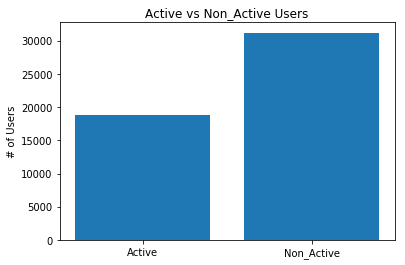

In [14]:
y_active = df_user.active.values.sum()
y_nonactive = len(df_user) - y_active

print('# of retained / active users = {}, {}% of total'.format(y_active,round(y_active/len(df_user)*100,2)))
print('# of non_active users = {}, {}% of total'.format(y_nonactive,round(y_nonactive/len(df_user)*100,2)))

plt.bar([0,1],[y_active,y_nonactive], align='center')
plt.xticks([0,1], ['Active','Non_Active'])
plt.ylabel('# of Users')
plt.title('Active vs Non_Active Users')
plt.show()

In [15]:
# there are 3 features that have null values
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int32
dtypes: bool(1), float64(6), int32(1), int64(1), object(4)
memory usage: 4.4+ MB


In [16]:
df_user.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.376080
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


### Data Cleaning, filling in missing values

In [17]:
# Need to fill in missing values in columns avg_rating_by_driver, avg_rating_of_driver and phone

In [18]:
# Fill in missing data of avg_rating_by_driver by the mean()
df_user[df_user.avg_rating_by_driver.isna()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
90,6.28,NaN,5.0,1.0,Winterfell,2014-02-09,iPhone,2014-01-10,0.0,1,False,0.0,0
274,6.00,NaN,2.0,4.0,Astapor,2014-02-09,iPhone,2014-01-25,100.0,1,False,0.0,0
277,1.82,NaN,NaN,1.0,Winterfell,2014-01-26,iPhone,2014-01-25,0.0,1,False,0.0,0
536,1.41,NaN,5.0,1.0,Winterfell,2014-02-08,Android,2014-01-18,0.0,1,False,100.0,0
857,0.42,NaN,4.0,1.0,Winterfell,2014-03-16,iPhone,2014-01-11,0.0,0,False,0.0,0


In [19]:
df_user['avg_rating_by_driver']=df_user.avg_rating_by_driver.fillna(df_user.avg_rating_by_driver.mean())

In [20]:
df_user[df_user.avg_rating_of_driver.isna()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
6,3.95,4.0,NaN,1.0,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0
9,2.37,5.0,NaN,1.0,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0
12,20.29,5.0,NaN,1.0,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1,False,100.0,0
14,26.01,5.0,NaN,1.0,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0,0
15,13.20,5.0,NaN,1.0,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,True,100.0,0


In [21]:
df_user['avg_rating_of_driver']=df_user.avg_rating_of_driver.fillna(df_user.avg_rating_of_driver.mean())

In [22]:
df_user.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.376080
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [23]:
df_user[df_user.phone.isna()].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
134,2.88,5.0,5.0,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0,1
176,20.32,5.0,5.0,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0,0
320,31.01,5.0,5.0,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0,0
349,6.03,5.0,3.3,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3,1
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7,1


In [24]:
# For phone, the missing values account for less than 1% of the total number values.
# Since the values are categorical, one could develop a model to predict the missing values. 
# Here we will create a list of values with the same proportion, 34582 'iPhone' and 15022 'Android', 
# and randomly draw and fill in the missing values.
keys,values = (Counter(df_user.phone.values)).keys(), (Counter(df_user.phone.values)).values()
Counter(df_user.phone.values)

Counter({'iPhone': 34582, 'Android': 15022, None: 396})

In [25]:
# Calculate proportion of iphone vs android
print(f'{list(keys)[0]}: {list(values)[0]/int(len(df_user.phone))}')
print(f'{list(keys)[1]}: {list(values)[1]/int(len(df_user.phone))}')
print(f'{list(keys)[2]}: {list(values)[2]/int(len(df_user.phone))}')

iPhone: 0.69164
Android: 0.30044
None: 0.00792


In [26]:
# create a list to draw from in the same proportion as above
phone_list = []
for num1 in range(list(values)[0]):
    phone_list.append(list(keys)[0])
for num2 in range(list(values)[1]):
    phone_list.append(list(keys)[1])
    
phone_list = np.asarray(phone_list)

# draw from list and create new list, calculate the new proportion
new_phone_list = []
for num in range(len(df_user.phone)):
    new_phone_list.append(np.random.choice(phone_list))
Counter(new_phone_list)

Counter({'iPhone': 34890, 'Android': 15110})

In [27]:
keys_after,values_after = (Counter(new_phone_list)).keys(), (Counter(new_phone_list)).values()

In [28]:
print(f'{list(keys_after)[0]}: {list(values_after)[0]/int(len(df_user.phone))}')
print(f'{list(keys_after)[1]}: {list(values_after)[1]/int(len(df_user.phone))}')
print('Similar proportion of iphone vs android as before')

iPhone: 0.6978
Android: 0.3022
Similar proportion of iphone vs android as before


In [29]:
# assign to dataframe column 'phone'
df_user['phone'] = new_phone_list

In [30]:
# back-check proportion
Counter(df_user.phone.values)

Counter({'iPhone': 34890, 'Android': 15110})

In [31]:
# All features are filled and there's no null values
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int32
dtypes: bool(1), float64(6), int32(1), int64(1), object(4)
memory usage: 4.4+ MB


### Translate 'signup_date' to duration (in days) and make it as feature

In [32]:
from dateutil import parser

# convert last_trip_date into datetime object

dt_last_trip_date = []
for num in range(len(df_user)):
    dt_last_trip_date.append((parser.parse(df_user.last_trip_date.values[num])))
                             
max(dt_last_trip_date)
# the last day and same as t_final calculated above

datetime.datetime(2014, 7, 1, 0, 0)

In [33]:
# convert signup_date into datetime object

dt_signup_date = []
for num in range(len(df_user)):
    dt_signup_date.append(parser.parse(df_user.signup_date.values[num]))

In [34]:
# Subtract signup_date from last_trip_date to obtain duration in days

duration = []
for num in range(len(df_user)):
    duration.append((dt_last_trip_date[num]-dt_signup_date[num]).days)

In [35]:
df_user['duration'] = duration

In [36]:
df_user.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,duration
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,iPhone,2014-01-29,0.0,0,False,50.0,0,96
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,170
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,iPhone,2014-01-27,11.8,14,False,82.4,0,47


In [37]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int32
duration                  50000 non-null int64
dtypes: bool(1), float64(6), int32(1), int64(2), object(4)
memory usage: 4.8+ MB


### Exploratory Analysis

In [38]:
import seaborn as sns

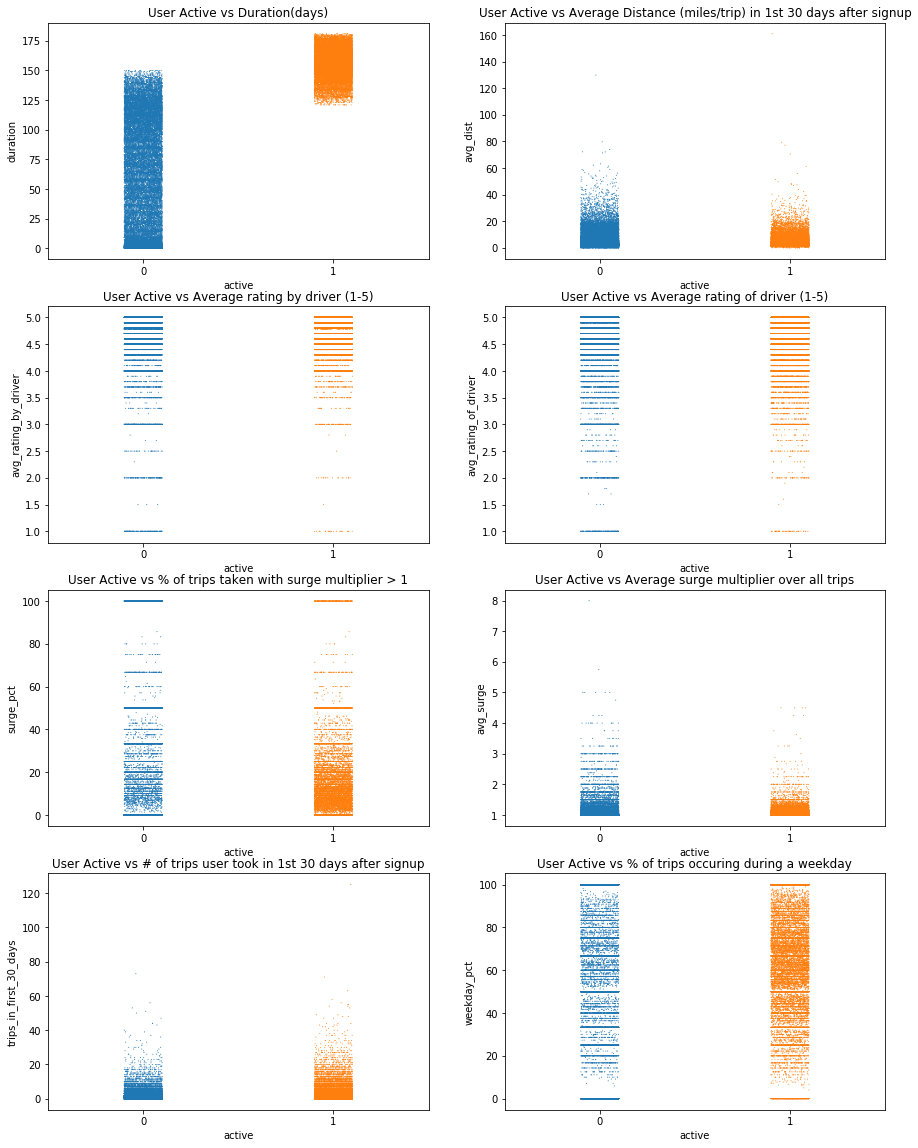

In [39]:
# Plot all numerical features vs user_activeness

fig = plt.figure(figsize=(15, 20))

size = 1

plt.subplot(4,2,1)
sns.stripplot(x='active',y='duration',data=df_user,jitter=True,size=size)
plt.title('User Active vs Duration(days)')
plt.xlabel('active')
plt.ylabel('duration')

plt.subplot(4,2,2)
sns.stripplot(x='active',y='avg_dist',data=df_user,jitter=True,size=size)
plt.title('User Active vs Average Distance (miles/trip) in 1st 30 days after signup')
plt.xlabel('active')
plt.ylabel('avg_dist')

plt.subplot(4,2,3)
sns.stripplot(x='active',y='avg_rating_by_driver',data=df_user,jitter=True,size=size)
plt.title('User Active vs Average rating by driver (1-5)')
plt.xlabel('active')
plt.ylabel('avg_rating_by_driver')

plt.subplot(4,2,4)
sns.stripplot(x='active',y='avg_rating_of_driver',data=df_user,jitter=True,size=size)
plt.title('User Active vs Average rating of driver (1-5)')
plt.xlabel('active')
plt.ylabel('avg_rating_of_driver')

plt.subplot(4,2,5)
sns.stripplot(x='active',y='surge_pct',data=df_user,jitter=True,size=size)
plt.title('User Active vs % of trips taken with surge multiplier > 1')
plt.xlabel('active')
plt.ylabel('surge_pct')

plt.subplot(4,2,6)
sns.stripplot(x='active',y='avg_surge',data=df_user,jitter=True,size=size)
plt.title('User Active vs Average surge multiplier over all trips')
plt.xlabel('active')
plt.ylabel('avg_surge')

plt.subplot(4,2,7)
sns.stripplot(x='active',y='trips_in_first_30_days',data=df_user,jitter=True,size=size)
plt.title('User Active vs # of trips user took in 1st 30 days after signup')
plt.xlabel('active')
plt.ylabel('trips_in_first_30_days')

plt.subplot(4,2,8)
sns.stripplot(x='active',y='weekday_pct',data=df_user,jitter=True,size=size)
plt.title('User Active vs % of trips occuring during a weekday')
plt.xlabel('active')
plt.ylabel('weekday_pct')

plt.show()

In [40]:
# Observations based on the numerical features plotted above,

# There is correlations between the following features and the target variable.
    # Duration, however this might not be a meaningful feature since this is something you are trying to improve as well.
    # Average Distance (miles/trip) in 1st 30 days after signup
    # Averge surge multiplier over all trips
    # Number of trips took in 1st 30 days after signup

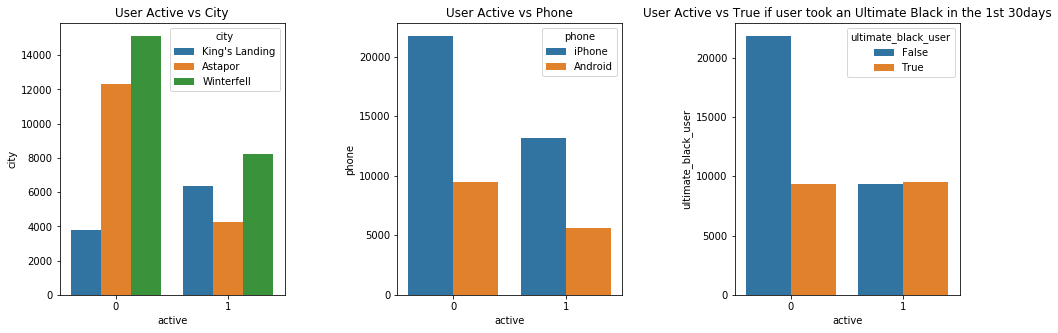

In [41]:
# Plot all categorical features vs user_activeness

fig = plt.figure(figsize=(20, 5))
fig.subplots_adjust(right=0.75,hspace=1, wspace=0.5)

plt.subplot(1,3,1)
sns.countplot(x="active", hue="city", data=df_user)
plt.title('User Active vs City')
plt.xlabel('active')
plt.ylabel('city')

plt.subplot(1,3,2)
sns.countplot(x="active", hue="phone", data=df_user)
plt.title('User Active vs Phone')
plt.xlabel('active')
plt.ylabel('phone')

plt.subplot(1,3,3)
sns.countplot(x="active", hue="ultimate_black_user", data=df_user)
plt.title('User Active vs True if user took an Ultimate Black in the 1st 30days')
plt.xlabel('active')
plt.ylabel('ultimate_black_user')

plt.show()

In [42]:
# Observations based on the categorical features plotted above, 

# It looks like users in King's Landing tend to stay active, while users in Astapor and Winterfell tend to become inactive.
# Not much correlation in phone vs user activeness.
# It seems that more users are inactive when they didn't take the ultimate black.

In [43]:
# Encode categorical features 'city' and 'phone', and 'ultimate_black_user'
cat_indexer = {"city" : {"King's Landing": 0,"Astapor":1, "Winterfell": 2}, "phone": {"iPhone": 0, "Android": 1}}
df_user.replace(cat_indexer, inplace=True)
df_user['ultimate_black_user'] = df_user['ultimate_black_user'] * 1

In [44]:
df_user.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,duration
0,3.67,5.0,4.7,1.10,0,2014-06-17,0,2014-01-25,15.4,4,1,46.2,1,143
1,8.26,5.0,5.0,1.00,1,2014-05-05,0,2014-01-29,0.0,0,0,50.0,0,96
2,0.77,5.0,4.3,1.00,1,2014-01-07,0,2014-01-06,0.0,3,0,100.0,0,1
3,2.36,4.9,4.6,1.14,0,2014-06-29,0,2014-01-10,20.0,9,1,80.0,1,170
4,3.13,4.9,4.4,1.19,2,2014-03-15,0,2014-01-27,11.8,14,0,82.4,0,47


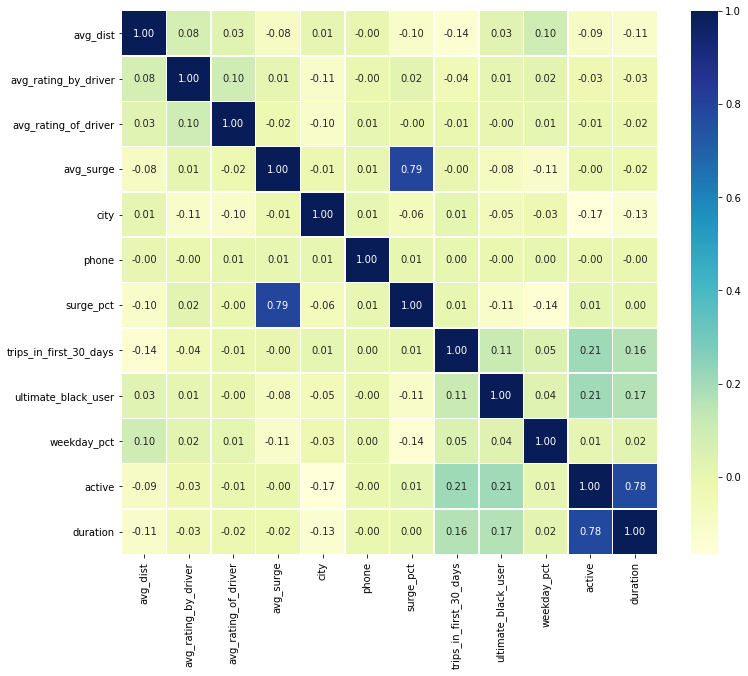

In [45]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.heatmap(df_user.corr(method='pearson'),linewidths=.5,annot=True, fmt='.2f',cmap="YlGnBu")
plt.show()

# Based on plotting the Pearson correlations on a heatmap, duration has the highest correlation with the user activeness.
# however, as mentioned above, it maybe not be a meaniningful piece of data.

# Features such as trips_in_first_30_days, ultimate_black_user and city have relatively stronger correlation with user
# activeness than other features.

### Build predictive model using logistic regression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [47]:
# Pick out the features for training
f_bool = (df_user.dtypes == 'float64') | (df_user.dtypes == 'int64') | (df_user.dtypes == 'int32') & (df_user.columns != 'active')
features = list(df_user.columns[f_bool])
features

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'phone',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct',
 'duration']

In [48]:
# Splitting data into training and test set @ 7:3 ratio

X_train, X_test, y_train, y_test = train_test_split(df_user[features],df_user['active'], test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 11)
(15000, 11)
(35000,)
(15000,)


In [93]:
# Using logistic regression to build a prediction model.
# Other algorithms such as kNN, SVM, RandomForest, etc. can also be used to select the best accuracies out of all.

# Assigned specific solver type and number of iterations due to future warning messages

# Let's do a first run

logreg_init = LogisticRegression(solver='lbfgs', max_iter=900)
logreg_init.fit(X_train,y_train)
logreg_score_init = logreg_init.score(X_test,y_test)
print("Initial Logistic regression model score: {}".format(logreg_score_init))

Initial Logistic regression model score: 0.9589333333333333


In [95]:
# Let's perform hyperparameter tunning to see if we can get higher accuracy

steps_unscaled = [('logreg', LogisticRegression())]
pipeline_unscaled = Pipeline(steps_unscaled)
param_grid = {'logreg__C' : np.logspace(-4, 4, 10),
              'logreg__solver' : ['lbfgs'],
              'logreg__max_iter': [900]           
             }

clf_unscaled = GridSearchCV(pipeline_unscaled, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1)

tuned_logreg_unscaled = clf_unscaled.fit(X_train,y_train)
tuned_logreg_score_unscaled = tuned_logreg_unscaled.score(X_test,y_test)
print("Tuned Logistic regression model score: {}".format(tuned_logreg_score_unscaled))

# About the same, but not better

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   39.2s finished


Tuned Logistic regression model score: 0.9580666666666666


In [96]:
# Let's perform hyperparameter tunning and scaled to see if we can get higher accuracy

steps_scaled = [('scaler', StandardScaler()),('logreg', LogisticRegression())]
pipeline_scaled = Pipeline(steps_scaled)
param_grid = {'logreg__C' : np.logspace(-4, 4, 10),
              'logreg__solver' : ['lbfgs'],
              'logreg__max_iter': [900]           
             }

clf_scaled = GridSearchCV(pipeline_scaled, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1)

tuned_logreg_scaled = clf_scaled.fit(X_train,y_train)
tuned_logreg_score_scaled = tuned_logreg_scaled.score(X_test,y_test)
print("Scaled and tuned Logistic regression model score: {}".format(tuned_logreg_score_scaled))

# This is better than the initial model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished
C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Scaled and tuned Logistic regression model score: 0.9592666666666667


In [97]:
tuned_logreg_scaled.best_params_

{'logreg__C': 0.046415888336127774,
 'logreg__max_iter': 900,
 'logreg__solver': 'lbfgs'}

In [ ]:
# Best model is the one that is tuned and scaled

In [108]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
logreg_best = LogisticRegression(C = tuned_logreg_scaled.best_params_['logreg__C'],solver='lbfgs', max_iter=900)
logreg_best.fit(X_train_scaled,y_train)
logreg_score_best = logreg_best.score(X_test_scaled,y_test)
print("Best Logistic regression model score: {}".format(logreg_score_best))

Best Logistic regression model score: 0.9592666666666667


In [110]:
logreg_coef_best = [features,list(logreg_best.coef_[0])]
df_logreg_coef_best = pd.DataFrame(logreg_coef_best, index=['feature','coef'])
df_logreg_coef_best.transpose().sort_values('coef', ascending=False)

# Best predictors are duration, city, ultimate_black_user and trips_in_first_30_days
# Same features that have high correlations shown in heatmap previously

,feature,coef
10,duration,8.34107
8,ultimate_black_user,0.313469
7,trips_in_first_30_days,0.244514
3,avg_surge,0.055831
0,avg_dist,0.0131645
5,phone,-0.0307633
2,avg_rating_of_driver,-0.0436881
6,surge_pct,-0.0473575
1,avg_rating_by_driver,-0.0563248
9,weekday_pct,-0.0966972


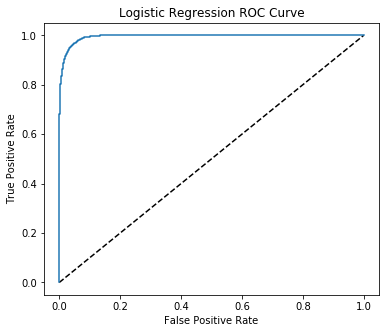

AUC = 0.9945401650274238


In [112]:
plt.rcParams['figure.figsize'] = [6, 5]

y_pred_prob = logreg_best.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print(f'AUC = {metrics.auc(fpr, tpr)}')

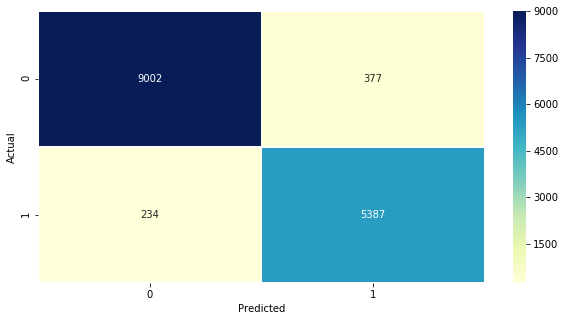

Precision = 93.46%
Recall = 95.84%
f1-score = 94.63%


In [114]:
conf_mat = confusion_matrix(y_test, logreg_best.predict(X_test_scaled))
tn,fp,fn,tp = conf_mat.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)      
f1 = 2 * (precision * recall) / (precision + recall)

fig = plt.figure(figsize=(10, 5))
sns.heatmap(conf_mat,annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

print('Precision = {:.2%}'.format(precision))
print('Recall = {:.2%}'.format(recall))
print('f1-score = {:.2%}'.format(f1))

### Build predictive model using kNN

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [117]:
steps_kNN_scaled = [('scaler', StandardScaler()),('kNN', KNeighborsClassifier())]
pipeline_kNN_scaled = Pipeline(steps_kNN_scaled)
param_grid_kNN = {'kNN__n_neighbors' : np.arange(1,21)}

clf_kNN_scaled = GridSearchCV(pipeline_kNN_scaled, param_grid = param_grid_kNN, cv = 5, verbose=1, n_jobs=-1)

kNN_scaled = clf_kNN_scaled.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.8min finished
C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [119]:
kNN_score_scaled = kNN_scaled.score(X_test,y_test)
print("Scaled Tuned kNN model score: {}".format(kNN_score_scaled))

C:\Users\kwong\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Scaled Tuned kNN model score: 0.9246666666666666


In [121]:
steps_kNN_unscaled = [('kNN', KNeighborsClassifier())]
pipeline_kNN_unscaled = Pipeline(steps_kNN_unscaled)
param_grid_kNN = {'kNN__n_neighbors' : np.arange(1,21)}

clf_kNN_unscaled = GridSearchCV(pipeline_kNN_unscaled, param_grid = param_grid_kNN, cv = 5, verbose=1, n_jobs=-1)

kNN_unscaled = clf_kNN_unscaled.fit(X_train,y_train)
kNN_unscaled_score = kNN_unscaled.score(X_test,y_test)
print("Unscaled Tuned kNN model score: {}".format(kNN_unscaled_score))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


Unscaled Tuned kNN model score: 0.9543333333333334


In [ ]:
# The logistic regression model produces slighlty better accuracy than the kNN model.

### Discussion on how to improve retention rate

As previously determined, the best predictors are duration, city, ultimate_black_user and trips_in_first_30_days. 

This means Ultimate can focus on these features and see how they can improve them in order to improve its long term user retention. Let's break it down to each individual feature on how each one can be improved.

For duration, Ultimate can provide incentives for users to stay active, such as discount and loyalty rewards.

For city, as shown in exploratory analysis previously, it seems that users in King's Landing tend to stay active, while users in Astapor and Winterfell tend to become inactive. Ultimate can pay more attention and focus its marketing and sales in these two cities.

For ultimate_black_user, it seems that more users become inactive when they didn't take the ultimate black in the first 30 days. Perhaps special offers for new users for the ultimate black would help.

For trips_in_first_30_days, discount offers for new users can help so they would take more trips initially.